# Basic Pipelines

Put on your Super Mario hats because we are going to dive into some pipelines!

## What will we accomplish

In this notebook we will:
- Introduce the concept of a pipeline,
- Review `sklearn`'s `Pipeline`s and
- Fit a polynomial regression using `PolynomialFeatures` and `Pipeline`

In [1]:
import numpy as np
np.random.seed(4403)
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

from sklearn.linear_model import LinearRegression

## What is a pipeline?

We have done a little bit of data preprocessing up to this point including, scaling and creating new features out of existing features (e.g. polynomial transforms, one-hot encoding and interactions). The concept of a <i>pipeline</i> is a nice framework for combining all of those steps and fitting a model all into one container. Here's a simple visualization that helps explain this concept:

<img src="lecture_4_assets/pipe.png" style="width:85%"></img>

<i>Mario of the Super Mario Brothers video game franchise is intellectual property of the Nintendo Corporation</i>.

## An example in python

Let's show how to implement this concept in python by doing an example problem. We will create some synthetic data where we would like to fit a polynomial regression model. 

In this example we will introduce:
- `PolynomialFeatures`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html</a> and 
- `Pipeline`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html</a>. 

In [2]:
## Generating some data
x = np.linspace(-3,7.5,1000)
y = (x-7)*(x+2)*x + 10*np.random.randn(1000) 

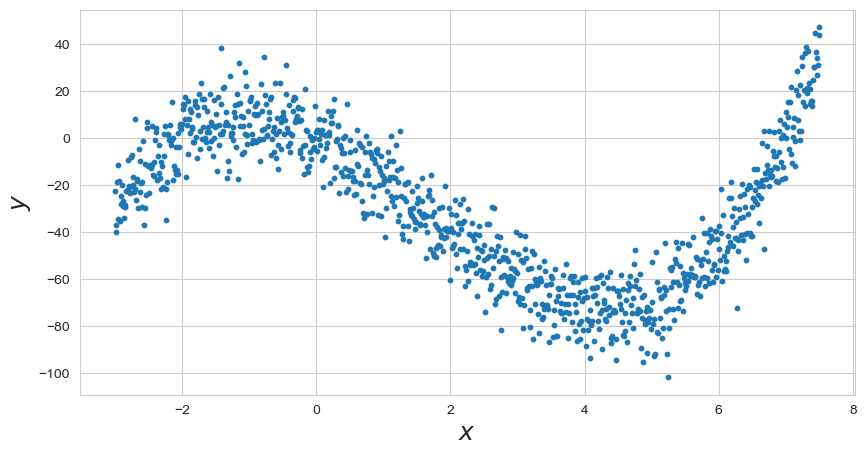

In [3]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.scatter(x,y, s=10)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

### `PolynomialFeatures`

`PolynomialFeatures` is an `sklearn` transformer object (similar to the scaler objects we have discussed) that takes in a 2D `numpy` array and returns a `numpy` array with columns corresponding to all the relevant polynomial transformations of the given `degree`, as illustrated by the image where `degree=2`:

<img src="lecture_4_assets/polyfeatures.png" width="65%"></img>

<i>Note: columns may not be returned in that order by actual `PolynomialFeatures` transformation.</i>

In [4]:
## import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [5]:
## demonstrate PolynomialFeatures
## the first argument is the degree of the polynomial
## the interaction_only term says whether you just want interaction terms returned
## include_bias determines whether or not a column of 1s is returned
poly = PolynomialFeatures(3,
                             interaction_only = False,
                             include_bias = False)


## in keeping with our sklearn objects we need to reshape 
## the array prior to fitting and transforming the model and array
poly.fit(x.reshape(-1,1))

PolynomialFeatures(degree=3, include_bias=False)

In [6]:
poly.transform(x.reshape(-1,1))

array([[ -3.        ,   9.        , -27.        ],
       [ -2.98948949,   8.93704741, -26.71720929],
       [ -2.97897898,   8.87431576, -26.43640009],
       ...,
       [  7.47897898,  55.93512657, 418.33763579],
       [  7.48948949,  56.09245281, 420.10383578],
       [  7.5       ,  56.25      , 421.875     ]])

Note that just like scaler objects transformer objects also have a `fit`, `transform` and `fit_transform` method. The rules for these are exactly the same as the rules for the scalers. This may seem confusing because it does not seem like `PolynomialFeatures` needs to "fit" anything, but it does. For `PolynomialFeatures` the `fit` step reads the shape of the input array and determines what transformations need to occur. In the above example, it sees that the array is a single column, so it needs to return:
- That column,
- That column squared and
- That column cubed.

Now that we have an idea of how `PolynomialFeatures` works let's incorporate this into a `Pipeline`.

In [7]:
## import Pipeline
from sklearn.pipeline import Pipeline

For our pipeline we will want to transform $x$ into $x$, $x^2$ and $x^3$ and then use the resulting data to fit the model
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \epsilon.
$$

Schematically our pipe will look like this:

<img src="lecture_4_assets/pipe_example.png" width="60%"></img>

The labels `'poly'` and `'reg'` should be clear soon.

In [8]:
## make the Pipeline object
## Pipeline objects take in a list as an argument
## that list contains tuples of the steps you want in your pipeline
## In this tuple we want PolynomialFeatures and
## LinearRegression
## Each tuple has a name for the step as its first entry,
## then the python object as its second entry
pipe = Pipeline([('poly', PolynomialFeatures(3,
                                                interaction_only=False,
                                                include_bias=False)),
                 ('reg', LinearRegression(copy_X = True))])

`Pipeline`'s also have a `fit` method. This is what runs the input and output data through the pipe and fits all relevant transformers and scalers followed by the model. We can call it like we have done for scaler and transformer object `fit` methods.

In [9]:
## fit the Pipeline object
pipe.fit(x.reshape(-1,1), y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('reg', LinearRegression())])

Once the pipe is fit we can make predictions like we would for a normal `LinearRegression` object.

In [10]:
## show we can make predictions
pipe.predict(x.reshape(-1,1))

array([-2.95973210e+01, -2.91508188e+01, -2.87073941e+01, -2.82670402e+01,
       -2.78297499e+01, -2.73955163e+01, -2.69643325e+01, -2.65361915e+01,
       -2.61110863e+01, -2.56890100e+01, -2.52699556e+01, -2.48539160e+01,
       -2.44408844e+01, -2.40308538e+01, -2.36238173e+01, -2.32197677e+01,
       -2.28186982e+01, -2.24206019e+01, -2.20254717e+01, -2.16333006e+01,
       -2.12440818e+01, -2.08578081e+01, -2.04744728e+01, -2.00940688e+01,
       -1.97165890e+01, -1.93420267e+01, -1.89703747e+01, -1.86016262e+01,
       -1.82357741e+01, -1.78728116e+01, -1.75127315e+01, -1.71555270e+01,
       -1.68011911e+01, -1.64497168e+01, -1.61010971e+01, -1.57553252e+01,
       -1.54123939e+01, -1.50722964e+01, -1.47350257e+01, -1.44005748e+01,
       -1.40689367e+01, -1.37401045e+01, -1.34140712e+01, -1.30908298e+01,
       -1.27703734e+01, -1.24526950e+01, -1.21377876e+01, -1.18256443e+01,
       -1.15162581e+01, -1.12096221e+01, -1.09057291e+01, -1.06045724e+01,
       -1.03061449e+01, -

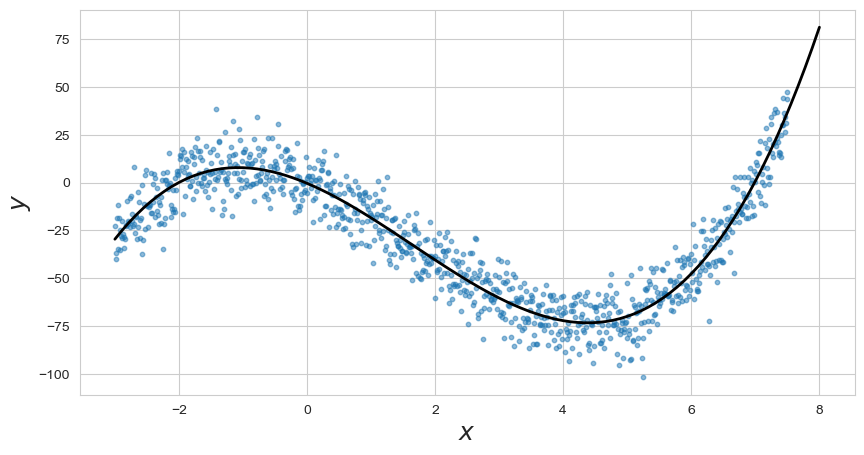

In [11]:
## Demonstrating the data
plt.figure(figsize=(10,5))

plt.scatter(x,y,alpha=.5,s=10)
plt.plot(np.linspace(-3,8,100), 
         pipe.predict(np.linspace(-3,8,100).reshape(-1,1)),
         'k',
         linewidth=2)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.show()

We can also access the individual pieces of the pipe and see what is going on in them. Below we access the fit `LinearRegression` object and look at the resulting coefficients.

In [12]:
## Show how to access individual components of Pipeline
## This is done similar to how a dictionary is accessed.
pipe['reg'].coef_

array([-14.13293289,  -4.95921206,   1.00021444])

Now we have a good introduction to `Pipeline`s. Note that while we did not use a `scaler` object, we could have. This particular problem just did not call for scaling the data.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)